<div align="center"> 

# Investigating Oil prices and Big Tech. Companies Stock Market 

<p>Between 2001-1-1 - 2023-12-31</p>
</div>

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

## **1.** Problem Statement

In this reserach, the stock prices of major tech companies (such as Apple, Microsoft, Google, Amazon, and META) and oil prices over the period spanning from January 2001 to December 2023 are investigated. By examining historical data for both sectors, the aim is to uncover insights into how changes in oil prices impact the financial performance of big tech companies, and vice versa.
The datasets would include the stock market data for:
- META
- AMazon
- Google
- Apple

## **2.** Solution Pipeline
1. Gather Data
2. Asses Data
3. Clean Data
4. Store Data
5. Answering Research Questions

### Neccessary Imports

In [1]:
## Run this cell to successfully run this notebook
## !pip install yfinance

In [2]:
import requests
import pandas as pd
import yfinance as yf
import requests
import config
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Gather data

In this section, data using two different (data gathering methods) are extractand and then combined. Two different types of data-gathering methods are use:
- Programmatically downloading files
- Gathering data by accessing APIs

### **3.1.** Gathering Data Methods and Code

In this project, two types of data gathering are use: 
- Programmatically downloading files
- Gathering data by accessing APIs

Each of the datasets have at least two variables, and have greater than 500 data samples within.

#### **Dataset 1**: Oils and Petroleum dataset 

##### *About this dataset*

**Type:** JSON response

**Method:** The data was gathered using the "by accessing APIs" method from https://api.eia.gov/v2/petroleum/pri/spt/data/

**Dataset variables:**

| Column Name | Description |
|---|---|
| period |  date associated with the data point |
| duoarea | identifier for a specific geographical area |
| area-name | area name |
| product | identifier for the specific petroleum product |
| product-name | name of the product |
| process | identifier for the specific process |
| process-name | The name of the process used |
| series | identifier for the specific data series |
| series-description | descriptive text name or label for the data |

##### *Gathering by API*

In [3]:
## Gather the data using the "Gather data by accessing APIs" method from https://api.eia.gov
api_key = config.EIA_API_KEY
url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?'

params = {
    'api_key':api_key,
    'start':'2005-01-01', 
    'end':'2023-12-31'
}

response = requests.get(url, params=params)
data = response.json()
oil_data =pd.DataFrame(data['response']['data'])
oil_data.sample(5)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description
2616,2006-09-15,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PF4,Spot Price FOB,EER_EPD2DXL0_PF4_RGC_DPG,U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel S...
1708,2019-04-19,RGC,NA,EPJK,Kerosene-Type Jet Fuel,PF4,Spot Price FOB,EER_EPJK_PF4_RGC_DPG,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...
1209,2014-04-11,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,PF4,Spot Price FOB,EER_EPD2DC_PF4_Y05LA_DPG,"Los Angeles, CA Ultra-Low Sulfur CARB Diesel S..."
1213,2015-01-16,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,PF4,Spot Price FOB,EER_EPD2DC_PF4_Y05LA_DPG,"Los Angeles, CA Ultra-Low Sulfur CARB Diesel S..."
2115,2019-04-05,RGC,NA,EPMRU,Conventional Regular Gasoline,PF4,Spot Price FOB,EER_EPMRU_PF4_RGC_DPG,U.S. Gulf Coast Conventional Gasoline Regular ...


In [4]:
oil_data.shape

(5000, 9)

> The gathered dataset have 5000 rows and 9 features.

In [5]:
oil_data.to_csv('data/oil_data_api.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

#### **Dataset 2**: Stocks Dataset

##### *About this dataset*
**Type:** Pandas.DataFrame

**Method:** The data was gathered using the "Programmatically downloading files" method from Yahoo Finance using the yfinance library

**Dataset variables:**

| Column Name | Description |
|---|---|
| Date | date associated with the data point |
| Open | The opening price of the stock on that date. |
| High | The highest price reached by the stock on that date. |
| Low | The lowest price reached by the stock on that date. |
| Close | The closing price of the stock on that date. |
| Adj Close | The adjusted closing price, adjusted for dividends and splits. |
| Volume | The number of shares traded on that date. |

##### *Gathering by Programmatically Downloading*

In [6]:
## 2nd data gathering was downloaded programitticallly from Yahoo Finance using the yfinance library
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = yf.download(companies, start='2005-01-01', end='2023-12-31')
stocks_data.reset_index(inplace=True)
stocks_data.sample(5)

[*********************100%%**********************]  5 of 5 completed


Price        Date   Adj Close                                                 \
Ticker                   AAPL        AMZN      GOOGL        META        MSFT   
4503   2022-11-21  146.800598   92.459999  95.490402  109.634705  239.048599   
847    2008-05-15    5.728848    3.806000  14.522873         NaN   22.244223   
2102   2013-05-10   13.971061   13.181500  22.002527   26.625288   26.841425   
4488   2022-10-31  151.835175  102.440002  94.401657   92.968956  228.607361   
1330   2010-04-16    7.470179    7.108500  13.751736         NaN   23.286184   

Price        Close                                     ...        Open  \
Ticker        AAPL        AMZN      GOOGL        META  ...        AAPL   
4503    148.009995   92.459999  95.599998  109.860001  ...  150.160004   
847       6.776071    3.806000  14.539540         NaN  ...    6.671786   
2102     16.177500   13.181500  22.027779   26.680000  ...   16.356071   
4488    153.339996  102.440002  94.510002   93.160004  ...  153.160004   
1330      8.835714    7.108500  13.767518         NaN  ...    8.877500   

Price                                                     Volume             \
Ticker        AMZN      GOOGL        META        MSFT       AAPL       AMZN   
4503     93.970001  97.290001  111.519997  241.429993   58724100   84330300   
847       3.694500  14.489489         NaN   29.980000  873208000  138354000   
2102     13.044000  21.904655   27.139999   32.669998  334852000   62906000   
4488    103.559998  95.419998   98.220001  233.759995   97943200   99251400   
1330      7.244000  14.089089         NaN   30.790001  750545600  167936000   

Price                                     
Ticker      GOOGL         META      MSFT  
4503     21647400   24351100.0  26394700  
847     173534292          NaN  53355800  
2102     75832092   30847100.0  36394900  
4488     31675000  121361400.0  28357300  
1330    488930580          NaN  88703100  

[5 rows x 31 columns]

In [7]:
stocks_data.shape

(4781, 31)

> The gathered data has 5785 data points and 31 features.

In [8]:
stocks_data.to_csv('data/stock_data.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

## 4. Assess data
Now that we have gathered the datasets, let's assess the dataset for data quality and structural issues. In this section, the data is assessed according to data quality and tidiness metrics. Where two data quality issues and two tidiness issues are assessed. Each are assess visually and programmatically, then the issue is described. Justifications for the methods used for the assessment are also included.
Issues assessed:
- Completness
- Validity
- Columns Names
- Inexing of the data

### **Completeness (Quality Issue #1):**
This is the issue of having missing data in the datsets. It affects good analysis and will be assessed for both datasets programmatically and visualy.

#### **Stocks Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

In [9]:
nan = ['NA','NaN','-', '0',0, np.nan] ## possible null vlaues

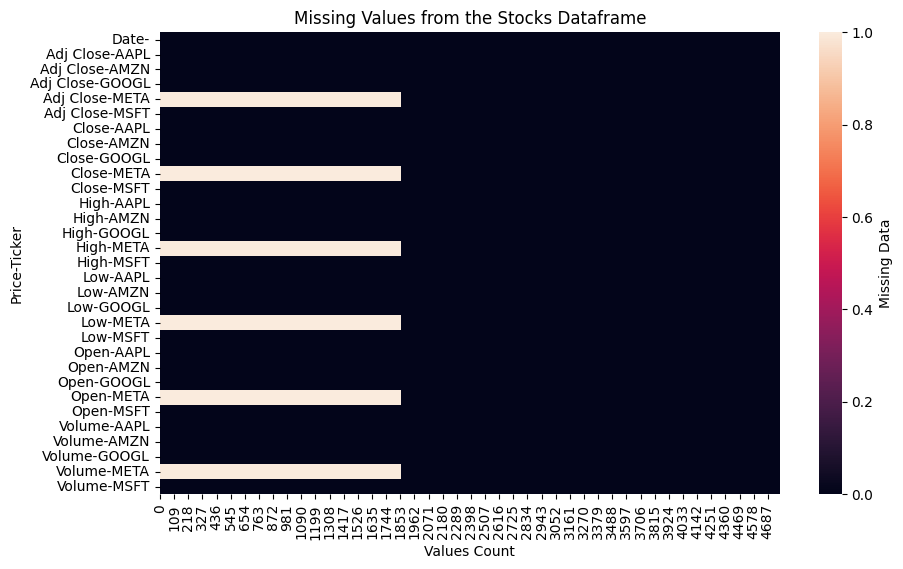

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Stocks Dataframe')
plt.xlabel('Values Count');

> Almost half of the data from the META company are missing. The other missing values are from Google company.

##### Inspecting the dataframe programmatically
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos.

In [11]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            4781 non-null   datetime64[ns]
 1   (Adj Close, AAPL)   4781 non-null   float64       
 2   (Adj Close, AMZN)   4781 non-null   float64       
 3   (Adj Close, GOOGL)  4781 non-null   float64       
 4   (Adj Close, META)   2923 non-null   float64       
 5   (Adj Close, MSFT)   4781 non-null   float64       
 6   (Close, AAPL)       4781 non-null   float64       
 7   (Close, AMZN)       4781 non-null   float64       
 8   (Close, GOOGL)      4781 non-null   float64       
 9   (Close, META)       2923 non-null   float64       
 10  (Close, MSFT)       4781 non-null   float64       
 11  (High, AAPL)        4781 non-null   float64       
 12  (High, AMZN)        4781 non-null   float64       
 13  (High, GOOGL)       4781 non-null   float64     

> While the range index is from 0 to 4781, some the columns arn't complete such as (Adj Close, GOOGL), (Adj Close, META), (Close, GOOGL), (Close, META),  (High, GOOGL), (High, META),  (Low, GOOGL),  (Low, META), (Open, GOOGL),  (Open, META),  (Volume, GOOGL), (Volume, META) and (Volume, MSFT).
> These missing data are specifically in data regarding the Google, and the META big tech companies.

In [12]:
stocks_data.isna().sum().sort_values(ascending=False) 

Price      Ticker
Open       META      1858
Volume     META      1858
Low        META      1858
Adj Close  META      1858
High       META      1858
Close      META      1858
Open       GOOGL        0
Low        MSFT         0
Open       AAPL         0
           AMZN         0
Date                    0
Low        AMZN         0
Open       MSFT         0
Volume     AAPL         0
           AMZN         0
           GOOGL        0
Low        GOOGL        0
High       MSFT         0
Low        AAPL         0
Adj Close  AAPL         0
High       GOOGL        0
           AMZN         0
           AAPL         0
Close      MSFT         0
           GOOGL        0
           AMZN         0
           AAPL         0
Adj Close  MSFT         0
           GOOGL        0
           AMZN         0
Volume     MSFT         0
dtype: int64

> There are 1858 missing records from the META Datasets.

#### **Oil Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

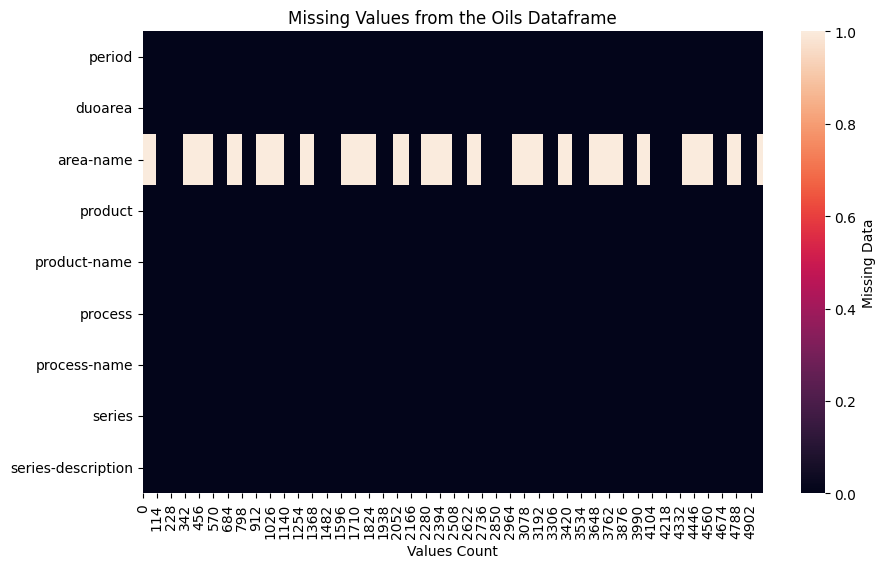

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(oil_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Oils Dataframe')
plt.xlabel('Values Count');

> The only column that has missing values in the oils dataframe is the area-name. It seems to have missing values alongside diffrent dates.

##### *Inspecting the dataframe programmatically*
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos. However, some missing values wesn't detected using these methods so there had to use the `.isin()` method to check if there are missing values programmatically.

In [14]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              5000 non-null   object
 1   duoarea             5000 non-null   object
 2   area-name           5000 non-null   object
 3   product             5000 non-null   object
 4   product-name        5000 non-null   object
 5   process             5000 non-null   object
 6   process-name        5000 non-null   object
 7   series              5000 non-null   object
 8   series-description  5000 non-null   object
dtypes: object(9)
memory usage: 351.7+ KB


> The data have 0 to 4999 indices, and all the columns non-null counts are full. 

In [15]:
oil_data.sample(5) ## take a sample of 5

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description
4406,2014-05-30,RGC,NA,EPJK,Kerosene-Type Jet Fuel,PF4,Spot Price FOB,EER_EPJK_PF4_RGC_DPG,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...
189,2020-11-20,Y35NY,NEW YORK CITY,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PF4,Spot Price FOB,EER_EPD2DXL0_PF4_Y35NY_DPG,New York Harbor Ultra-Low Sulfur No 2 Diesel S...
2949,2019-11-22,Y35NY,NEW YORK CITY,EPD2F,No 2 Fuel Oil / Heating Oil,PF4,Spot Price FOB,EER_EPD2F_PF4_Y35NY_DPG,New York Harbor No. 2 Heating Oil Spot Price F...
2172,2009-10-09,Y35NY,NEW YORK CITY,EPMRU,Conventional Regular Gasoline,PF4,Spot Price FOB,EER_EPMRU_PF4_Y35NY_DPG,New York Harbor Conventional Gasoline Regular ...
4921,2019-12-13,Y35NY,NEW YORK CITY,EPMRU,Conventional Regular Gasoline,PF4,Spot Price FOB,EER_EPMRU_PF4_Y35NY_DPG,New York Harbor Conventional Gasoline Regular ...


> However with further looking, it was noticed that there are NA values used to presnet the null values.

In [16]:
oil_data.isin(nan).sum() ## to check if some values are not detected using isna

period                   0
duoarea                  0
area-name             2743
product                  0
product-name             0
process                  0
process-name             0
series                   0
series-description       0
dtype: int64

> In the oil dataset there appears to be 2743 NA values from the area-name column. The other columns doesn't have NA values. However, the duoarea have no missing values.

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the dataset using the `.datatype` attribute of the datasets.

In [17]:
stocks_data.dtypes ## looking into datatypes

Price      Ticker
Date                 datetime64[ns]
Adj Close  AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Close      AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
High       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Low        AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Open       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Volume     AAPL               int64
          

> The datastypes are all valid. Let's take a look into why For the volume some of the columns have integer values.

In [18]:
stocks_data['Date'].sample(5) ## Take a sample of 5

3222   2017-10-19
895    2008-07-24
60     2005-03-31
2692   2015-09-14
2003   2012-12-17
Name: Date, dtype: datetime64[ns]

> The datetime64 is actuualy only the date of the record there is no timestamps.

In [19]:
int_col= list(stocks_data.dtypes[stocks_data.dtypes == 'int64']['Volume'].index) ## take the values where the datatypes are integers
for col in int_col:
    print(stocks_data['Volume',col].sample(5))

414     655191600
4218     80861100
3161     75415600
2713    132197200
2446    211153600
Name: (Volume, AAPL), dtype: int64
3543    218206000
3344    102288000
2102     62906000
326     107752000
3604     70120000
Name: (Volume, AMZN), dtype: int64
259     404606988
2352     49040000
464     196111692
666      92910996
2193     63852084
Name: (Volume, GOOGL), dtype: int64
626     71193900
3789    19680800
430     49135000
1700    64592500
4076    26034900
Name: (Volume, MSFT), dtype: int64


> The dataset is valid in terms of data types for the integers columns.

##### *Inspecting the dataframe visually*
The visualization used to check for datatypes validity is a summary statics table.

In [20]:
## Inspecting the dataframe visually
stocks_data.describe().T

count                           mean                  min  \
Price     Ticker                                                               
Date                4781  2014-07-01 15:02:04.241790208  2005-01-03 00:00:00   
Adj Close AAPL    4781.0                      43.406251             0.955513   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.617377             4.374109   
          META    2923.0                     157.370234             17.69364   
          MSFT    4781.0                      85.750155            11.263439   
Close     AAPL    4781.0                      45.151456             1.130179   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.666289             4.379129   
          META    2923.0                      157.69362                17.73   
          MSFT    4781.0                      91.896614                15.15   
High      AAPL    4781.0                      45.611048             1.159107   
          AMZN    4781.0                       48.02516                1.315   
          GOOGL   4781.0                      43.102564             4.464464   
          META    2923.0                     159.668765                18.27   
          MSFT    4781.0                      92.781004                15.62   
Low       AAPL    4781.0                      44.649769             1.117857   
          AMZN    4781.0                      46.862393                1.288   
          GOOGL   4781.0                      42.210375             4.318569   
          META    2923.0                     155.638686            17.549999   
          MSFT    4781.0                      90.932192                14.87   
Open      AAPL    4781.0                      45.120857             1.139107   
          AMZN    4781.0                      47.467806               1.3045   
          GOOGL   4781.0                      42.655534             4.386887   
          META    2923.0                      157.61935                18.08   
          MSFT    4781.0                      91.865313                 15.2   
Volume    AAPL    4781.0               403190325.831416           24048300.0   
          AMZN    4781.0               108328400.397406           17626000.0   
          GOOGL   4781.0               115393301.946873            9312000.0   
          META    2923.0                30604724.769073            5467500.0   
          MSFT    4781.0                45513886.467266            7425600.0   

                                  25%                  50%  \
Price     Ticker                                             
Date              2009-10-01 00:00:00  2014-07-02 00:00:00   
Adj Close AAPL               5.748776            20.945789   
          AMZN                 4.7205              16.6425   
          GOOGL             13.190316            27.369587   
          META              80.604355           153.205185   
          MSFT              20.658804            35.504246   
Close     AAPL               6.799643            23.620001   
          AMZN                 4.7205              16.6425   
          GOOGL             13.205455            27.400999   
          META              80.769997           153.520004   
          MSFT              27.690001            41.459999   
High      AAPL               6.881429            23.887501   
          AMZN                 4.7925               16.829   
          GOOGL             13.343343            27.627001   
          META              81.470001           155.589996   
          MSFT                  27.93                41.66   
Low       AAPL               6.738571            23.407499   
          AMZN                 4.6535               16.441   
          GOOGL             13.075075               27.222   
          META              80.154999           151.660004   
          MSFT

> As noticed in the Date columns there is no need for the timestamped column datatype. Will be axtracting the year and month from it as integers after mereg.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the datasets using the `.datatype` attribute of the datasets.

In [21]:
oil_data.dtypes

period                object
duoarea               object
area-name             object
product               object
product-name          object
process               object
process-name          object
series                object
series-description    object
dtype: object

> All the datatypes in oil data are seen as objects. But as seen in the sample of the data some are dates and bumers.

In [22]:
oil_data.sample(2).T

,2275,1438
period,2009-02-20,2015-06-19
duoarea,ZEU,Y35NY
area-name,NA,NEW YORK CITY
product,EPCBRENT,EPD2DXL0
product-name,UK Brent Crude Oil,No 2 Diesel Low Sulfur (0-15 ppm)
process,PF4,PF4
process-name,Spot Price FOB,Spot Price FOB
series,RBRTE,EER_EPD2DXL0_PF4_Y35NY_DPG
series-description,Europe Brent Spot Price FOB (Dollars per Barrel),New York Harbor Ultra-Low Sulfur No 2 Diesel S...


> So most of the data here are categorical.

In [23]:
oil_data.nunique()

period                990
duoarea                 6
area-name               3
product                 9
product-name            9
process                 1
process-name            1
series                 11
series-description     11
dtype: int64

> The date column is named period instead of date. Each of the process and the process-name have only one unique value that is, they don't bring a value to the dataset.

##### *Inspecting the dataframe visually*
The inspecting visually is using the summary statistics table.

In [24]:
oil_data.describe().T

,count,unique,top,freq
period,5000,990,2008-07-25,10
duoarea,5000,6,RGC,1434
area-name,5000,3,NA,2743
product,5000,9,EPMRU,950
product-name,5000,9,Conventional Regular Gasoline,950
process,5000,1,PF4,5000
process-name,5000,1,Spot Price FOB,5000
series,5000,11,EER_EPLLPA_PF4_Y44MB_DPG,520
series-description,5000,11,"Mont Belvieu, TX Propane Spot Price FOB (Dolla...",520


> Note that we have only one unique value for both of the process name and the process columns, they don't bring a value to the dataset.

### **Columns Names: (Tidiness Issue #1):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [25]:
stocks_data.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> The columns names have to converted to the appropriate and by the convintion naming of columns.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [26]:
oil_data.columns

Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description'],
      dtype='object')

> The names of these columns would be better mapped for the merging, the column of date is named period. other coulmns could use a more meaningful name and using the convention of columns naming.

### **Indexing (Tidiness Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [27]:
print(stocks_data.index)
stocks_data.columns

RangeIndex(start=0, stop=4781, step=1)


MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> This dataset is multi-indexed. It would be difficult to deal with. Since we have to have one observation per row, let's better take the decision to handle this case into one observation per row.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [28]:
print(oil_data.index)
oil_data.columns

RangeIndex(start=0, stop=5000, step=1)


Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description'],
      dtype='object')

> The index of the second dataset is a range index starting from 0 to 5000.

## 5. Clean data
It's time to address the issues found during assessment to clean and polish your data.

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [148]:
## Making copies of the datasets to ensure the raw dataframes are not impacted
oil_data_cleaned = oil_data.copy()
stocks_data_cleaned =stocks_data.copy()

### **Completeness (Quality Issue #1):**

There was missing values in both of the datasets.

#### **Stocks Dataset**
For the stocks datsaets, the method chosen for handling missing values is to use the fillin method using the backward startegy since as shown in the heatmap for misisng values it(missing values) starts from the first index. 

> Justification: *For the META facebook before, there seems to be missing values for some reason, however it was checked if the stock nasdaq name used to be FB so did that affect the way the data was gathered and it turned out to not. FB was created in 2005 and it's supposed to have these stocks too,*

In [149]:
## apply the fill in backward way for META
stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB
stocks_data_cleaned.sample(5)

C:\Users\SS\AppData\Local\Temp\ipykernel_23100\3280220914.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB


Price        Date   Adj Close                                                  \
Ticker                   AAPL        AMZN       GOOGL        META        MSFT   
2612   2015-05-20   29.265358   21.193001   27.593830   80.384819   41.572483   
515    2007-01-22    2.620602    1.847500   12.019239   38.151604   21.974056   
4444   2022-08-29  159.796280  129.789993  109.294563  158.843582  261.205048   
1319   2010-03-31    7.095765    6.788500   14.175922   38.151604   22.238424   
713    2007-11-01    5.659702    4.382500   17.577675   38.151604   26.780701   

Price        Close                                      ...        Open  \
Ticker        AAPL        AMZN       GOOGL        META  ...        AAPL   
2612     32.514999   21.193001   27.625500   80.550003  ...   32.500000   
515       3.099643    1.847500   12.033033   38.230000  ...    3.183571   
4444    161.380005  129.789993  109.419998  159.169998  ...  161.149994   
1319      8.392857    6.788500   14.192192   38.230000  ...    8.410357   
713       6.694286    4.382500   17.597849   38.230000  ...    6.735714   

Price                                                       Volume             \
Ticker        AMZN       GOOGL        META        MSFT        AAPL       AMZN   
2612     21.030001   27.546000   80.470001   47.389999   145819600   43924000   
515       1.882500   12.324825   42.049999   31.059999  1454026000  166340000   
4444    129.899994  109.989998  160.660004  265.850006    73314000   48101600   
1319      6.800000   14.140390   42.049999   29.639999   430659600   92012000   
713       4.387500   17.587337   42.049999   36.529999   805036400  165314000   

Price                                      
Ticker      GOOGL         META       MSFT  
2612     30840000   23056900.0   25047900  
515     215955828  573576400.0   56143900  
4444     21191200   20052700.0   20338500  
1319    121110768  573576400.0   63760000  
713     260826912  573576400.0  152078800  

[5 rows x 31 columns]

In [150]:
## Let's validate the cleaning was successful
stocks_data_cleaned.isin(nan).sum()

Price      Ticker
Date                 0
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

#### **Oil Dataset**
For the oil dataset the areas names were missing and this would be handling by the follwing mapping:

In [151]:
print(list(oil_data_cleaned['duoarea'].unique()))
list(oil_data_cleaned['area-name'].unique())

['RGC', 'Y35NY', 'Y44MB', 'Y05LA', 'ZEU', 'YCUOK']


['NA', 'NEW YORK CITY', 'LOS ANGELES']

> So we have 5 unique duoarea without NA and three unique names. The decision is to map them and fill the missing one using the mapping.

In [152]:
duoarea_to_area_name = oil_data_cleaned.dropna(subset=['area-name']).drop_duplicates(subset=['duoarea'])[['duoarea', 'area-name']].set_index('duoarea')['area-name'].to_dict()
duoarea_to_area_name

{'RGC': 'NA',
 'Y35NY': 'NEW YORK CITY',
 'Y44MB': 'NA',
 'Y05LA': 'LOS ANGELES',
 'ZEU': 'NA',
 'YCUOK': 'NA'}

In [153]:
duoarea_name_mapping = {'Y35NY': 'NEW YORK CITY',
 'RGC': 'UKRAINE',
 'ZEU': 'CANADA',
 'Y05LA': 'LOS ANGELES',
 'Y44MB': 'MONT BELVIEU',
 'YCUOK': 'Oklahoma'}

> The NA ones are replaced with the actual area names from the internet source.

> Justification: *because for the duoarea there is no missing values and that is used and utilized to fill in the area names.*

In [154]:
def fill_area_name(row):
    """
    This function takes a row and fills the area name
    Args:
        - row: the row
    Returns:
        - string the area name
    """
    return duoarea_name_mapping.get(row['duoarea'], 'Unknown')

In [155]:
## Let's apply the mapping into the area-name column
oil_data_cleaned['area-name'] = oil_data_cleaned.apply(fill_area_name, axis=1)

In [156]:
## Let's validate the cleaning was successful
oil_data_cleaned.isin(nan).sum()

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**
In the stocks dataset the datatypes were accurate, only the datetime only contains teh date so it is storing unnecceray data of 00:00:00 time.

> All the datatypes are valid for the stocks datasets.

> *The decsision will be to extract teh months, years and days after the merge. To make more sense when visualization and answering the reswarch question.*

#### **Oils Dataset**
In the oil datsaet there were all of the datatypes are objects.

In [157]:
## Apply the cleaning strategy which is use teh to_datetime
oil_data_cleaned['period'] = pd.to_datetime(oil_data_cleaned['period'])

In [158]:
## to Validate the cleaning was successful used info
oil_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              5000 non-null   datetime64[ns]
 1   duoarea             5000 non-null   object        
 2   area-name           5000 non-null   object        
 3   product             5000 non-null   object        
 4   product-name        5000 non-null   object        
 5   process             5000 non-null   object        
 6   process-name        5000 non-null   object        
 7   series              5000 non-null   object        
 8   series-description  5000 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 351.7+ KB


> We can see the period successfully changed into the datetime datatype.

### **Columns Names: (Tidiness Issue #1):**
This issue includes the columns names and renaming to the convention.

#### **Stocks Dataset**
The cleaning here is done by applying the new mapping following the convention to the dataset.

In [159]:
new_stocks_names = {
    col: ('_'.join([col[0].lower(), col[1].lower()])).replace(' ', '_') if col[0] != 'Date' else 'date'
    for col in stocks_data_cleaned.columns
}
new_stocks_names

{('Date', ''): 'date',
 ('Adj Close', 'AAPL'): 'adj_close_aapl',
 ('Adj Close', 'AMZN'): 'adj_close_amzn',
 ('Adj Close', 'GOOGL'): 'adj_close_googl',
 ('Adj Close', 'META'): 'adj_close_meta',
 ('Adj Close', 'MSFT'): 'adj_close_msft',
 ('Close', 'AAPL'): 'close_aapl',
 ('Close', 'AMZN'): 'close_amzn',
 ('Close', 'GOOGL'): 'close_googl',
 ('Close', 'META'): 'close_meta',
 ('Close', 'MSFT'): 'close_msft',
 ('High', 'AAPL'): 'high_aapl',
 ('High', 'AMZN'): 'high_amzn',
 ('High', 'GOOGL'): 'high_googl',
 ('High', 'META'): 'high_meta',
 ('High', 'MSFT'): 'high_msft',
 ('Low', 'AAPL'): 'low_aapl',
 ('Low', 'AMZN'): 'low_amzn',
 ('Low', 'GOOGL'): 'low_googl',
 ('Low', 'META'): 'low_meta',
 ('Low', 'MSFT'): 'low_msft',
 ('Open', 'AAPL'): 'open_aapl',
 ('Open', 'AMZN'): 'open_amzn',
 ('Open', 'GOOGL'): 'open_googl',
 ('Open', 'META'): 'open_meta',
 ('Open', 'MSFT'): 'open_msft',
 ('Volume', 'AAPL'): 'volume_aapl',
 ('Volume', 'AMZN'): 'volume_amzn',
 ('Volume', 'GOOGL'): 'volume_googl',
 ('Volu

In [160]:
stocks_data_cleaned.columns = stocks_data_cleaned.columns.map(new_stocks_names)

In [161]:
## Validate the cleaning was successful by calling the .columns
stocks_data_cleaned.columns

Index(['date', 'adj_close_aapl', 'adj_close_amzn', 'adj_close_googl',
       'adj_close_meta', 'adj_close_msft', 'close_aapl', 'close_amzn',
       'close_googl', 'close_meta', 'close_msft', 'high_aapl', 'high_amzn',
       'high_googl', 'high_meta', 'high_msft', 'low_aapl', 'low_amzn',
       'low_googl', 'low_meta', 'low_msft', 'open_aapl', 'open_amzn',
       'open_googl', 'open_meta', 'open_msft', 'volume_aapl', 'volume_amzn',
       'volume_googl', 'volume_meta', 'volume_msft'],
      dtype='object')

In [162]:
stocks_data_cleaned.sample(1).T

,1247
date,2009-12-15 00:00:00
adj_close_aapl,5.862914
adj_close_amzn,6.5115
adj_close_googl,14.826326
adj_close_meta,38.151604
adj_close_msft,22.686584
close_aapl,6.934643
close_amzn,6.5115
close_googl,14.843343
close_meta,38.23


> Justification: *It is the best practice to follow the naming conventions of the dataset columns and for ease of use.*
We can see that the names are changed by looking at the head and the columns.

#### **Oil Dataset**
The cleaning here is done by applying the new mapping following the convention to the dataset.

In [163]:
## axtracting the new names
new_oils_names = {
    'period': 'date',
    'duoarea': 'duoarea',
    'area-name': 'area_name',
    'product': 'product',
    'product-name': 'product_name',
    'series': 'series',
    'process-name': 'process_name',
    'process': 'process',
    'series-description': 'series_description'
}
new_oils_names

{'period': 'date',
 'duoarea': 'duoarea',
 'area-name': 'area_name',
 'product': 'product',
 'product-name': 'product_name',
 'series': 'series',
 'process-name': 'process_name',
 'process': 'process',
 'series-description': 'series_description'}

In [164]:
oil_data_cleaned.columns = oil_data_cleaned.columns.map(new_oils_names)

In [165]:
## Validating the cleaning step for renaming to conventional names
oil_data_cleaned.columns

Index(['date', 'duoarea', 'area_name', 'product', 'product_name', 'process',
       'process_name', 'series', 'series_description'],
      dtype='object')

> We can see that the new names are applied.

### **Indexing (Tidiness Issue #2):**
The indexing in the dataframes are checked in the assessing and were decided to be simplified from multi-indexing.

> *The renaming of the columns to conventional have actually fixed the problem of multiindexing and simplidied the dataset.*

In [166]:
stocks_data_cleaned.index

RangeIndex(start=0, stop=4781, step=1)

In [167]:
oil_data_cleaned.index

RangeIndex(start=0, stop=5000, step=1)

### **Remove unnecessary variables and combine datasets**

Now let's peform the combination and remove unnecessary variables in the final dataset.

#### **Oil Dataset**
In the oil satasets the process-name and the process have only one unique value, that is they will be dropped because they don't change by the observations.

In [168]:
oil_data_cleaned.drop(columns=['process','process_name'],inplace=True)

In [169]:
oil_data_cleaned.columns

Index(['date', 'duoarea', 'area_name', 'product', 'product_name', 'series',
       'series_description'],
      dtype='object')

> They were validated to be dropped ffrom the cleaned datset.

#### **Combined Dataset**

In [170]:
## combine datasets
merged_data = pd.merge(oil_data_cleaned, stocks_data_cleaned, on='date')
merged_data.sample(5).T

,3606,3010,2486,129,2343
date,2022-05-13 00:00:00,2005-09-09 00:00:00,2017-01-20 00:00:00,2011-08-05 00:00:00,2012-08-17 00:00:00
duoarea,ZEU,Y44MB,Y05LA,Y35NY,YCUOK
area_name,CANADA,MONT BELVIEU,LOS ANGELES,NEW YORK CITY,Oklahoma
product,EPCBRENT,EPLLPA,EPD2DC,EPD2DXL0,EPCWTI
product_name,UK Brent Crude Oil,Propane,Carb Diesel,No 2 Diesel Low Sulfur (0-15 ppm),WTI Crude Oil
series,RBRTE,EER_EPLLPA_PF4_Y44MB_DPG,EER_EPD2DC_PF4_Y05LA_DPG,EER_EPD2DXL0_PF4_Y35NY_DPG,RWTC
series_description,Europe Brent Spot Price FOB (Dollars per Barrel),"Mont Belvieu, TX Propane Spot Price FOB (Dolla...","Los Angeles, CA Ultra-Low Sulfur CARB Diesel S...",New York Harbor Ultra-Low Sulfur No 2 Diesel S...,"Cushing, OK WTI Spot Price FOB (Dollars per Ba..."
adj_close_aapl,145.464249,1.549292,27.846104,11.281361,19.653536
adj_close_amzn,113.055,2.1475,40.4165,10.135,12.0585
adj_close_googl,115.917465,7.476155,41.361031,14.473879,16.926018


## 6. Update the data store
In this section, the local database/data store in the directory data are updated with the cleaned data too, with best practices for storing cleaned data:
- Maintained different instances / versions of data (raw and cleaned data)
- Named the dataset files informatively
- Ensure both the raw and cleaned data are saved to the database/data store directory.

> Now the datasets are cleaned they are saved to separete file.

In [ ]:
oil_data_cleaned.to_csv('data/oil_data_api_cleaned.csv', index=False) ## store to cvs file

In [ ]:
stocks_data_cleaned.to_csv('data/stock_data_cleaned.csv', index=False) ## store to cvs file

## 7. Research

### **7.1:** Oil Prices and Big Tech. Stocks 
In this section the cleaned data copies are reloaded and used to answer the question raised.

*Research question:* 

How does the stocks of the big Tech. Companies such as Google and Amazon, META and Micorsoft and prices of oils changes or correlates in the same year?

In [ ]:
## Visual 1 - FILL IN
## Plotting the corrleation matrix

*Answer to research question:* FILL IN

In [ ]:
## Visual 2 - FILL IN
## Visualizing the stocks and oils as a time line for comparison

*Answer to research question:* FILL IN

### **7.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN